# Commands to get results

```bash
cd hh_combination_fw
source setup.sh

mkdir run
cd run
cp ../configs/correlation_schemes/Legacy2022/nonres_v2.json correlation.json
cp ../configs/task_options/Legacy2022/nonres_all_v1.yaml option_all.yaml
fullwspath="/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces"

HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy,bbll -n nonres --file_expr '<mX[F]>_kl' -o output --config option_all.yaml --unblind --tasks modification,likelihood,limit
HHComb combine_channels -i output -s correlation.json -c bbbb,bbtautau,bbyy,bbll -n nonres --file_expr '<mX[F]>_kl' --config option_all.yaml --unblind --tasks combination,likelihood,limit
```

# Plotting

In [56]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
hh_fw = os.environ.get('hh_combination_fw_path', '/besfs5/users/cyz/HH_comb/hh_combination_fw')

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'nonres'
status = 'int'

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'bbll': r"$\mathit{b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$",
    'ml': r"Multilepton",
    'combined': r"Combined",
}
channel_text = {
    # 'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b} + b\bar{b}\ell\ell}$',
    'combined': r'$\mathit{HH}$ combination',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbll': r'$\mathit{HH\rightarrow b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$',
    'ml': r'$\mathit{HH}\rightarrow multilepton$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$',
}
name_map = {'kl': r"$\mathit{\kappa_{\lambda}}$", 'k2v': r"$\mathit{\kappa_{2V}}$",
            'mu_ggF': r"$\mu_{\mathrm{ggF}}$", 'mu_VBF': r"$\mu_{\mathrm{VBF}}$", 'mu': r"$\mu_{\mathrm{ggF+VBF}}$"}
labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status, 'dy': 0.01, 'dy_main': 0.01}
styles_map = {
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'bbbb': {"color": 'blue', "marker": ","},
    'bbtautau': {"color": "#008f00", "marker": ","},
    'bbll': {"color": "#D2691E", "marker": ","},
    'ml': {"color": "c", "marker": ","},
    'combined': {"color": "k", "marker": ","},
}
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536"],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k"],
            'linestyles': ['solid', 'dashed'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
    }
}
if os.path.exists(os.path.join(hh_fw,"hhcomb_to_upload/sm_kappa","output")):
    output_dir = os.path.join(os.path.join(hh_fw,"hhcomb_to_upload/sm_kappa","output"))
else:
    output_dir = os.path.join(hh_fw,"run","output_mu")

def remove_list(data):
    for k, v in data.items():
        for p,v_ in v.items():
            data[k][p] = v_[0]
    return data

def set_plotdir(output_dir):
    plotdir = os.path.join(output_dir, 'figures')
    if not os.path.exists(plotdir):
        os.makedirs(plotdir)
    return plotdir


<Figure size 432x288 with 0 Axes>

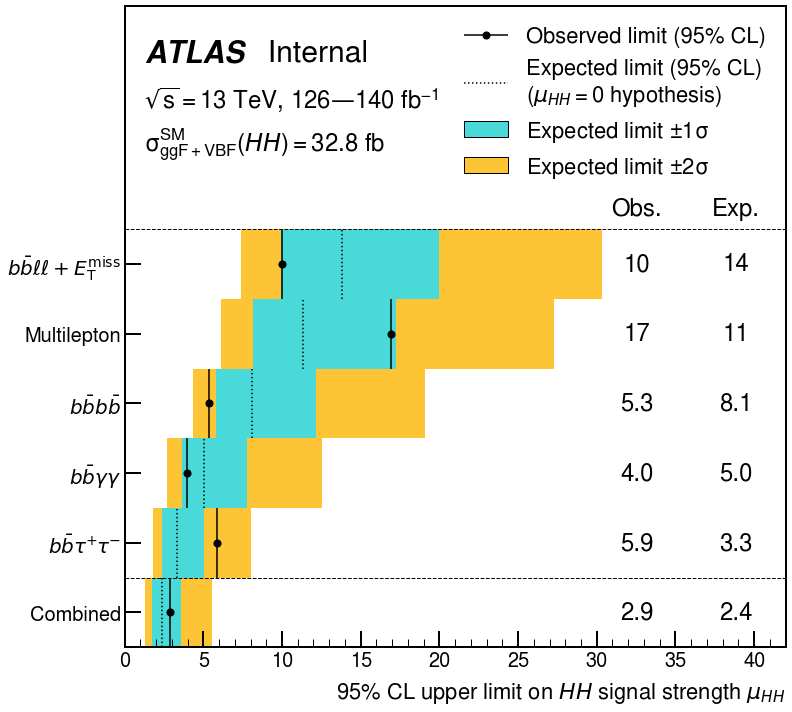

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit/limit_mu.pdf


<Figure size 432x288 with 0 Axes>

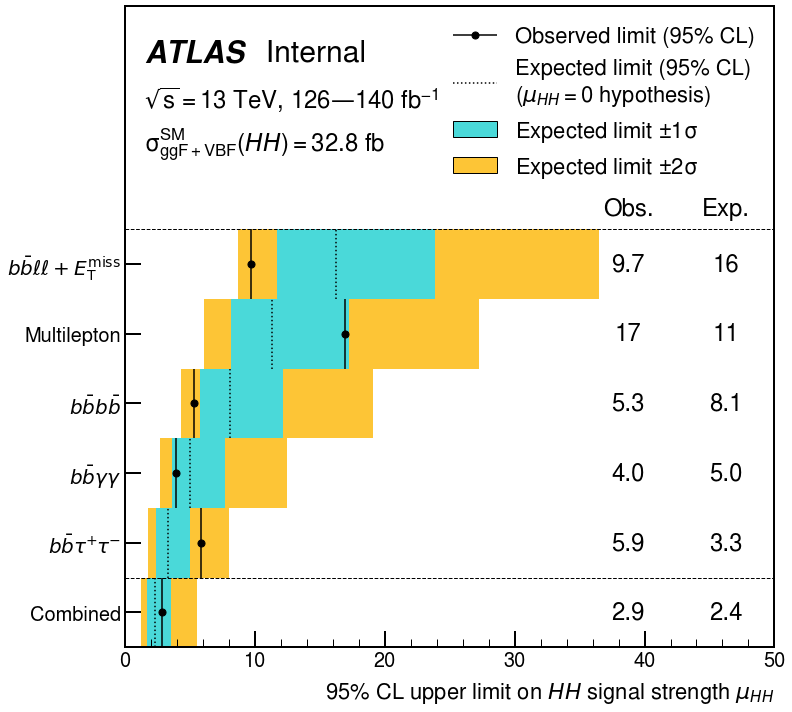

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit/limit_mu_paperbbll.pdf


In [57]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.8$ fb'

from quickstats.plots import UpperLimit1DPlot

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)
styles = {'figure': {'figsize': (11.111111, 10), 'dpi': 72},
           'text': {'fontsize': 24},}

data = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', 'mu', 'limits_mu.json')
    if not os.path.exists(limit_path):
        print(limit_path, 'not found')
        continue
    data[c] = json.load(open(limit_path))
data_dict = remove_list(data)
sm_limit_df = pd.DataFrame(data_dict)
filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
sm_limit_df = sm_limit_df[filtered_order]
sm_limit_df['bbll']['obs'] = 10.01

for corr_bbll in [False, True]:
    suffix += '_paperbbll' if corr_bbll else ''
    if corr_bbll:
        sm_limit_df['bbll']['obs'] = 9.7
        sm_limit_df['bbll']['0'] = 16.22732948335831
        sm_limit_df['bbll']['2'] = 36.48622687404195
        sm_limit_df['bbll']['1'] = 23.889231899314886
        sm_limit_df['bbll']['-1'] = 11.692689445118935
        sm_limit_df['bbll']['-2'] = 8.709626089177
    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels, styles=styles,
                               analysis_label_options=default_analysis_label_options, config={'top_margin': 3.2})
    xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    if corr_bbll: ax.set_xlim([0, 50])
    else: ax.set_xlim([0, 42])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu{suffix}.pdf")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

/eos/home-c/caiyi/HH_comb/hh_framework/submodules/quickstats/quickstats/plots/upper_limit_1D_plot.py:190: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlim[0] - (xlim[1]/0.7 - xlim[1])*0.5, xlim[1]/0.7)
/tmp/ipykernel_3069350/1508216883.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])


<Figure size 432x288 with 0 Axes>

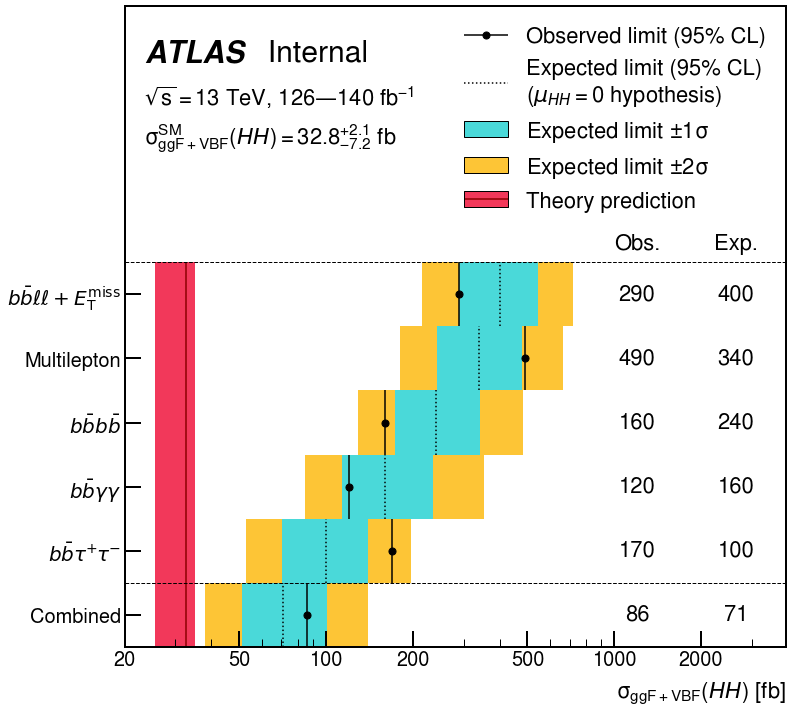

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit/limit_xsec.pdf


In [58]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']

from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)
default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.8_{-7.2}^{+2.1}$ fb'
styles = {'figure': {'figsize': (11.111111, 10), 'dpi': 72}}

def SM_error(ggf_cv, ggf_up, ggf_dn, vbf_cv, vbf_up, vbf_dn):
    up = 1 + np.sqrt(ggf_cv*ggf_cv*ggf_up*ggf_up + vbf_cv*vbf_cv*vbf_up*vbf_up) / (ggf_cv + vbf_cv)
    dn = 1 - np.sqrt(ggf_cv*ggf_cv*ggf_dn*ggf_dn + vbf_cv*vbf_cv*vbf_dn*vbf_dn) / (ggf_cv + vbf_cv)
    return up, dn

data = {}
for c in channels + ['combined']:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', 'xsec', 'limits_mu.json')
    if not os.path.exists(limit_path):
        print(limit_path, 'not found')
        continue
    data[c] = json.load(open(limit_path))
data_dict = remove_list(data)
sm_limit_df = pd.DataFrame(data_dict)
total_cross = 32.776
sm_limit_df *= total_cross
xerrhi, xerrlo = SM_error(ggf_cv=31.02, ggf_up=np.sqrt(np.square(0.03)+np.square(0.06)), ggf_dn=np.sqrt(np.square(0.03)+np.square(0.23)), vbf_cv=1.723, vbf_up=np.sqrt(np.square(0.0003)+np.square(0.021)), vbf_dn=np.sqrt(np.square(0.0004)+np.square(0.021)))
xerrhi, xerrlo = xerrhi * total_cross, xerrlo * total_cross
filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
sm_limit_df = sm_limit_df[filtered_order]
sm_limit_df['bbll']['obs'] = 290
sm_limit_df['bbll']['0'] = 400
sm_limit_df['ml']['obs'] = 490
sm_limit_df['ml']['0'] = 340
sm_limit_df['bbbb']['obs'] = 160
sm_limit_df['bbbb']['0'] = 240
sm_limit_df['bbyy']['obs'] = 120
sm_limit_df['bbyy']['0'] = 160
sm_limit_df['bbtautau']['obs'] = 170
sm_limit_df['bbtautau']['0'] = 100

plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels,styles=styles,
                           analysis_label_options=default_analysis_label_options, config={'top_margin': 4.0})
plotter.add_curve(x=total_cross, xerrlo=xerrlo, xerrhi=xerrhi, label="Theory prediction")
xlabel = r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]"
ax = plotter.draw(logx=True, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
ax.set_xlim([20, 120*total_cross])
ax.xaxis.set_major_locator(LogLocator(base=10, subs=(1,2,5)))
ax.set_xticklabels([1,2,5,10,20,50, 100, 200, 500, 1000, 2000])
os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit', f"limit_xsec{suffix}.pdf")
plt.tight_layout()
plt.savefig(filename)
plt.show()
print('Save to', filename)
sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

<Figure size 432x288 with 0 Axes>

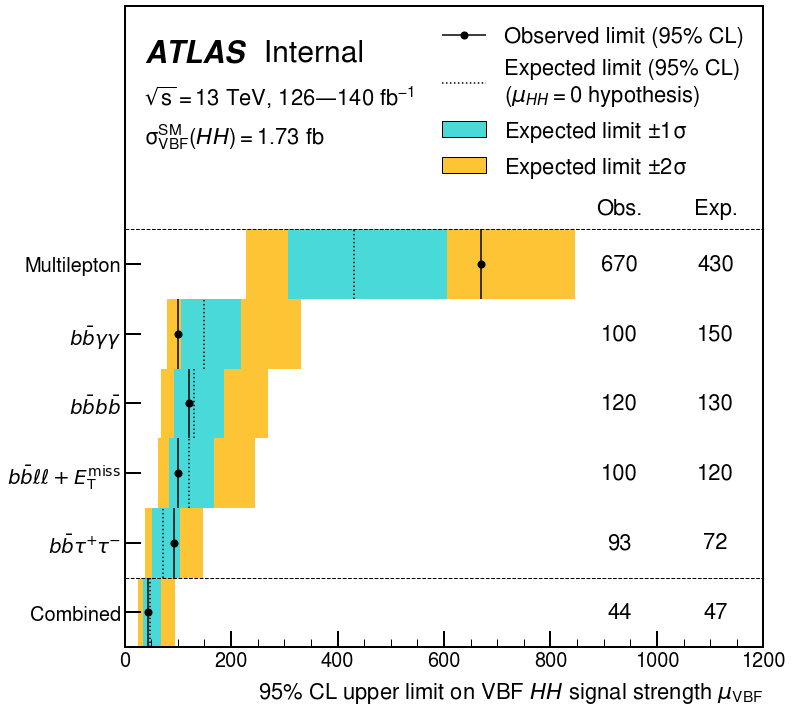

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit/limit_mu_VBF.pdf


<Figure size 432x288 with 0 Axes>

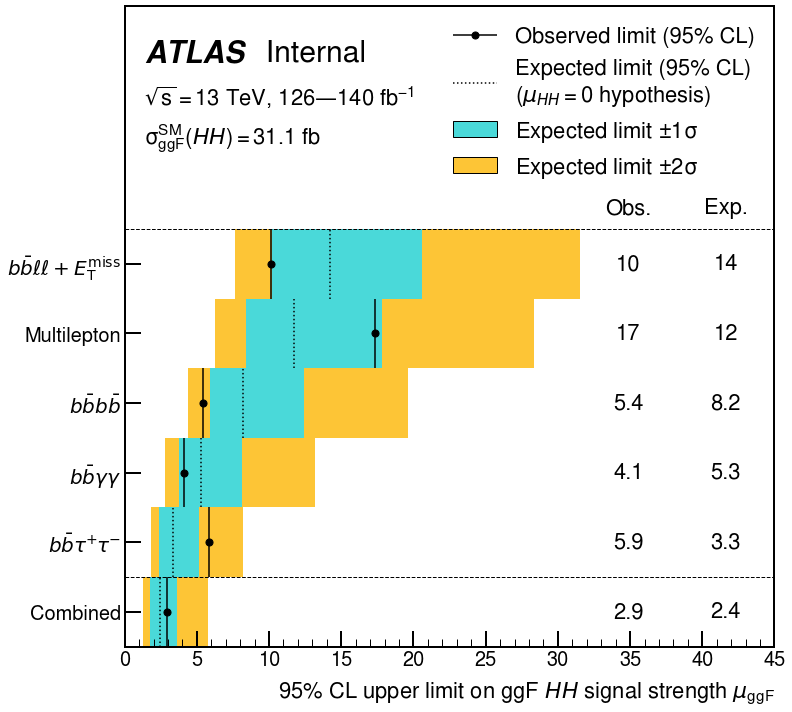

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit/limit_mu_ggF.pdf


In [59]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'

from quickstats.plots import UpperLimit1DPlot

suffix = '_nocorr' if 'nocorr' in combine_tag else ''
plotdir = set_plotdir(output_dir)
styles = {'figure': {'figsize': (11.111111, 10), 'dpi': 72}}

for mode in ['VBF', 'ggF']:
    if mode == 'VBF':
        channels = ['bbtautau', 'bbll', 'bbbb', 'bbyy', 'ml']
        default_analysis_label_options['extra_text'] = r'$\sigma_{VBF}^{SM} (\mathit{HH})=1.73$ fb'
    else:
        channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
        default_analysis_label_options['extra_text'] = r'$\sigma_{ggF}^{SM} (\mathit{HH})=31.1$ fb'
    data = {}
    for c in channels + ['combined']:
        limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', f'mu_{mode}', f'limits_mu_{mode}.json')
        if not os.path.exists(limit_path):
            print(limit_path, 'not found')
            continue
        data[c] = json.load(open(limit_path))
    data_dict = remove_list(data)
    sm_limit_df = pd.DataFrame(data_dict)
    filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
    sm_limit_df = sm_limit_df[filtered_order]
    if mode=='VBF':
        sm_limit_df['ml']['obs'] = 670
        sm_limit_df['ml']['0'] = 430
        sm_limit_df['bbyy']['obs'] = 100
        sm_limit_df['bbyy']['0'] = 150
        sm_limit_df['bbbb']['obs'] = 120
        sm_limit_df['bbbb']['0'] = 130
        sm_limit_df['bbll']['obs'] = 100
        sm_limit_df['bbll']['0'] = 120

    plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=[filtered_order[1]], labels=labels, styles=styles,
                            analysis_label_options=default_analysis_label_options, config={'top_margin': 3.2})
    xlabel = r"95% CL upper limit on "+mode+" $\mathit{HH}$ signal strength $\mathit{\mu}_{"+mode+"}$"
    ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
    ax.set_xlim([0, 45 if mode == 'ggF' else 1200])
    os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu_{mode}{suffix}.pdf")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    print('Save to', filename)
    sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

kl obs bbyy 68%: [[0.5375 5.2408]] 95%: [[-1.4407  6.9179]]
kl obs bbtautau 68%: [[-1.7145  3.3037]] 95%: [[-3.151   9.0235]]
kl obs ml 68%: [[-4.3389  0.6325]
 [ 4.3545  9.8609]] 95%: [[-6.2391 11.6289]]
kl obs bbbb 68%: [[0.6315 8.8198]] 95%: [[-3.3177 10.9854]]
kl obs bbll 68%: [[-2.3589  9.0027]] 95%: [[-6.3124 13.2648]]
kl obs combined 68%: [[0.2167 5.8934]] 95%: [[-1.1978  7.1595]]


<Figure size 432x288 with 0 Axes>

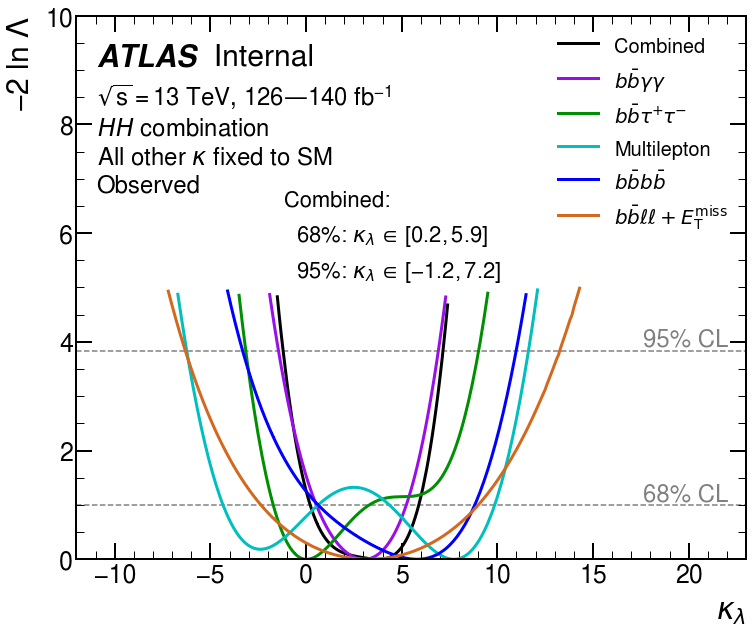

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_kl_obs.pdf
kl exp bbyy 68%: [[-1.2114  6.0857]] 95%: [[-2.8475  7.8117]]
kl exp bbtautau 68%: [[-1.0175  7.6241]] 95%: [[-2.5166  9.2238]]
kl exp ml 68%: [[-2.3774  7.4622]] 95%: [[-4.4528  9.5747]]
kl exp bbbb 68%: [[-2.9005  8.9067]] 95%: [[-5.2938 11.2915]]
kl exp bbll 68%: [[-6.8415 12.921 ]] 95%: [[-10.3807  17.0724]]
kl exp combined 68%: [[-0.4981  5.6867]] 95%: [[-1.6407  7.1582]]


<Figure size 432x288 with 0 Axes>

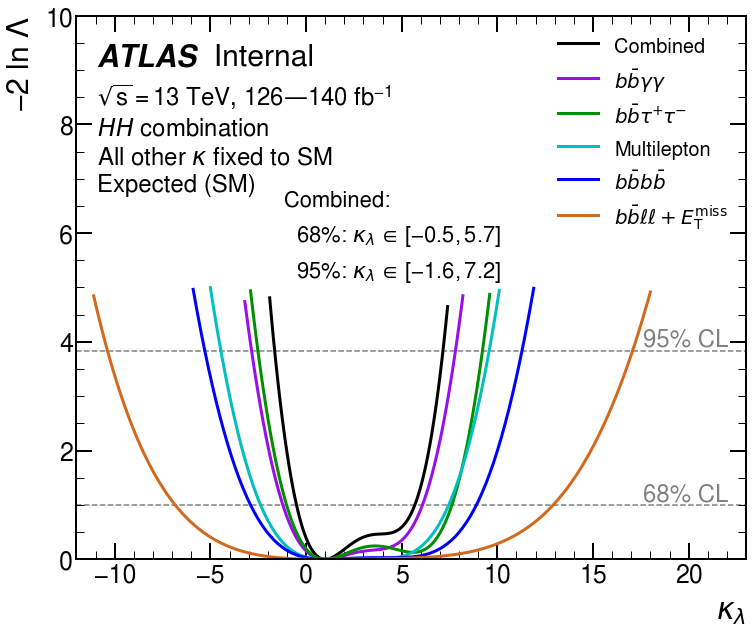

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_kl_exp.pdf
k2v obs bbbb 68%: [[0.7886 1.243 ]] 95%: [[0.5466 1.4901]]
k2v obs bbtautau 68%: [[-0.1371  2.2985]] 95%: [[-0.5147  2.6807]]
k2v obs bbll 68%: [[0.3599 1.7981]] 95%: [[-0.1904  2.3513]]
k2v obs bbyy 68%: [[0.2714 1.9286]] 95%: [[-0.4769  2.678 ]]
k2v obs ml 68%: [[-1.5854  3.7303]] 95%: [[-2.4845  4.646 ]]
k2v obs combined 68%: [[0.7943 1.2419]] 95%: [[0.5687 1.4807]]


<Figure size 432x288 with 0 Axes>

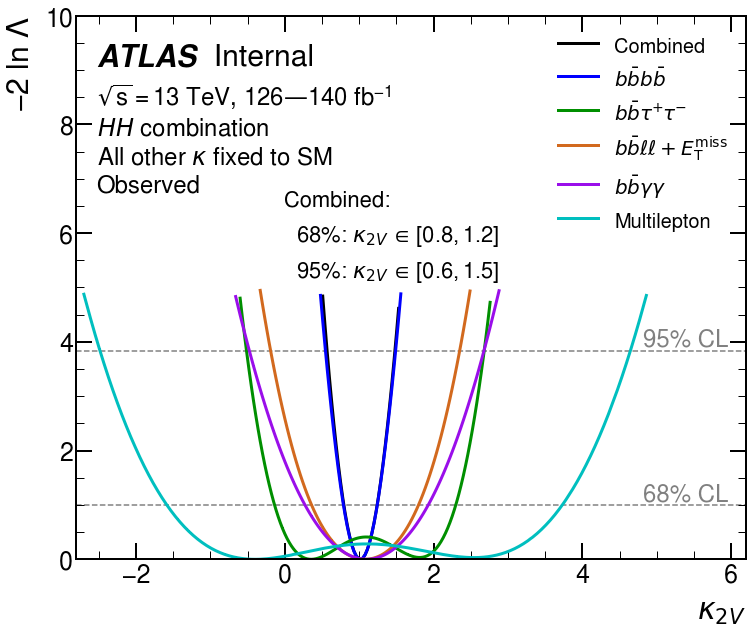

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_k2v_obs.pdf
k2v exp bbbb 68%: [[0.629  1.4011]] 95%: [[0.3827 1.6546]]
k2v exp bbtautau 68%: [[0.1681 2.0051]] 95%: [[-0.2457  2.4183]]
k2v exp bbll 68%: [[0.0285 2.1416]] 95%: [[-0.5042  2.6751]]
k2v exp bbyy 68%: [[-0.3456  2.5453]] 95%: [[-1.1259  3.3275]]
k2v exp ml 68%: [[-0.9344  3.1021]] 95%: [[-1.898   4.0702]]
k2v exp combined 68%: [[0.6372 1.4042]] 95%: [[0.4119 1.6462]]


<Figure size 432x288 with 0 Axes>

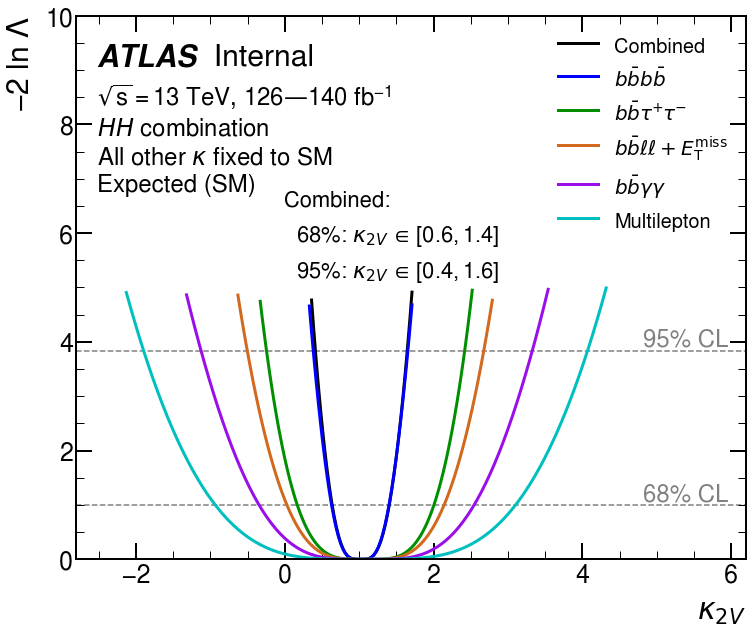

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_k2v_exp.pdf
mu obs bbtautau 68%: [[0.5819 4.0344]] 95%: [[-0.716   6.6229]]
mu obs bbyy 68%: [[  -inf 0.2467]] 95%: [[  -inf 2.8394]]
mu obs bbbb 68%: [[-8.6842 -0.7673]] 95%: [[  -inf 2.8758]]
mu obs ml 68%: [[0.2564    inf]] 95%: [[-4.4271     inf]]
mu obs bbll 68%: [[   -inf -1.1372]] 95%: [[  -inf 5.5808]]
mu obs combined 68%: [[-0.5772  1.6387]] 95%: [[-1.6234  3.089 ]]


<Figure size 432x288 with 0 Axes>

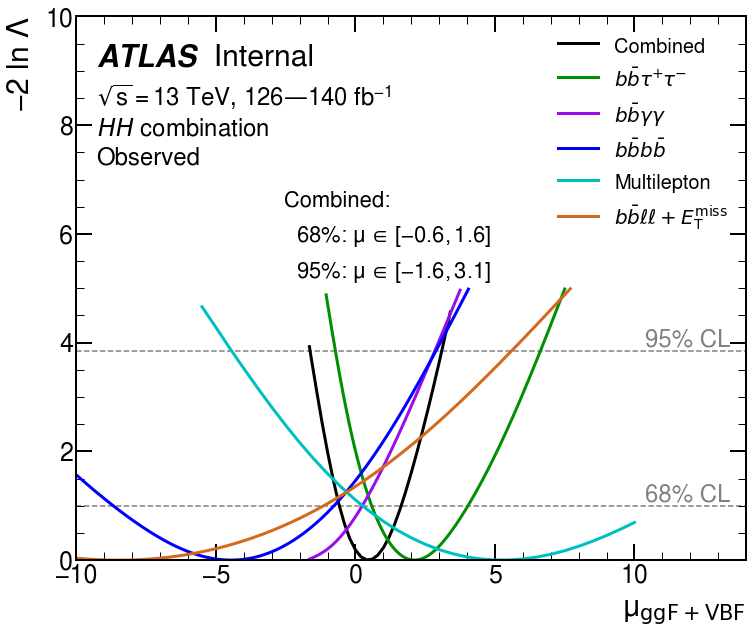

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_mu_obs.pdf
mu exp bbtautau 68%: [[   -inf -7.4573]
 [-7.384  -4.8082]
 [-4.6491 -2.3619]
 [-0.2989  2.5795]] 95%: [[   -inf -7.4553]
 [-7.4079 -4.8049]
 [-4.7094 -2.3562]
 [-1.4468  4.7007]]
mu exp bbyy 68%: [[-0.6938  3.4529]] 95%: [[  -inf 6.8628]]
mu exp bbbb 68%: [[-2.6749  4.816 ]] 95%: [[-6.797   9.4828]]
mu exp ml 68%: [[-3.5782  6.1168]] 95%: [[-8.3851     inf]]
mu exp combined 68%: [[-0.0116  2.2127]] 95%: [[-0.8935  3.7912]]


<Figure size 432x288 with 0 Axes>

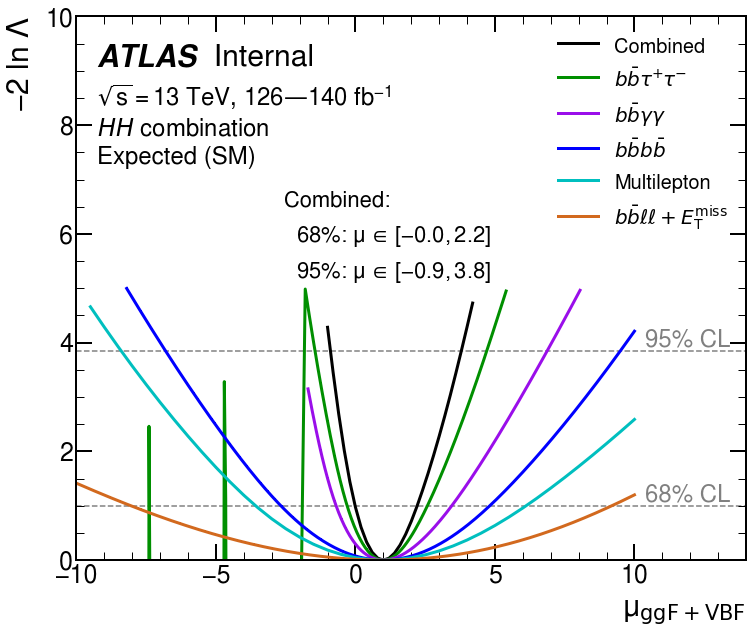

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_mu_exp.pdf


In [60]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
# xrange = {'kl': (-12, 20),'k2v': (-1.5, 3.5),'mu': (-10,20)}
xrange = {'kl': (-12, 23),'k2v': (-2.8, 6.2),'mu': (-10,14)}
styles = { 'legend': {'loc': 'upper right','fontsize': 20, 'handleheight':1.35},
           'text': {'fontsize': 24},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3},
           'axis': {'labelsize': 25},
           'figure': {'figsize': (12,10), 'dpi': 72}}
anno_op = {'x': 0.31, 'y': 0.65, 'dy': 0.065, 'font_size': 22}

for v in ['kl','k2v','mu']:
# for v in ['k2v']:
    if v=='kl':
        channels = ['bbyy', 'bbtautau', 'ml', 'bbbb', 'bbll']
    elif v=='k2v':
        channels = ['bbbb', 'bbtautau', 'bbll', 'bbyy', 'ml']
    else:
        channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + ("//" + r"All other $\mathit{\kappa}$ fixed to SM" if v!='mu' else '') + '//' + ('Observed' if o == 'obs' else 'Expected (SM)')
        data = {}
        for c in ['combined'] + channels:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>5].index)
        if v=="mu":
            text_x = 0.977
        else:
            text_x = 0.973
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True,'sigma_text_styles':{'x':text_x}})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in channels + ['combined']:
            dic[c] = {}
            if c not in likelihood_df: continue
            try:
                intersections_01 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)
                intersections_02 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)
                intersections_1 = intersections_01[0]
                intersections_2 = intersections_02[0]
                # sigma_at_0 = likelihood_df_orig[c][likelihood_df_orig[c][v] == 0]['qmu'].values[0]
                dic[c]['68% low'], dic[c]['68% high'] = intersections_1
                if len(intersections_01)>1: dic[c]['68% low add'], dic[c]['68% high add'] = intersections_01[-1]
                dic[c]['95% low'], dic[c]['95% high'] = intersections_2
                if len(intersections_02)>1: dic[c]['95% low add'], dic[c]['95% high add'] = intersections_02[-1]
                # dic[c]['sigma_at_0'] = np.sqrt(sigma_at_0)
                if c == 'combined':
                    if v=='k2v':
                        ax.annotate(r'Combined:', 
                                    (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                        ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                                    (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                        ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                                    (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    else:
                        ax.annotate(r'Combined:', 
                                    (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                        ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                                    (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                        ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                                    (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                # print(v, o, c, '68%:', intersections_01, '95%:', intersections_02, 'sigma_at_0:', dic[c]['sigma_at_0'])
                print(v, o, c, '68%:', intersections_01, '95%:', intersections_02)
            except:
                continue
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}.pdf")
        plt.savefig(filename)
        plt.show()
        print('Save to', filename)
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


mu obs bbtautau 68%: [0.5819 4.0344] 95%: [-0.716   6.6229] sigma_at_0: 1.417563262378264
mu obs bbyy 68%: [  -inf 1.0745] 95%: [ -inf 3.486] sigma_at_0: 0.0
mu obs bbbb 68%: [  -inf 1.3426] 95%: [  -inf 4.3676] sigma_at_0: 0.0
mu obs ml 68%: [0.2564    inf] 95%: [-4.4271     inf] sigma_at_0: 1.051917353012817
mu obs bbll 68%: [  -inf 2.5588] 95%: [  -inf 8.0621] sigma_at_0: 0.0
mu obs combined 68%: [-0.5772  1.6387] 95%: [-1.6234  3.089 ] sigma_at_0: 0.4334027991090433


<Figure size 432x288 with 0 Axes>

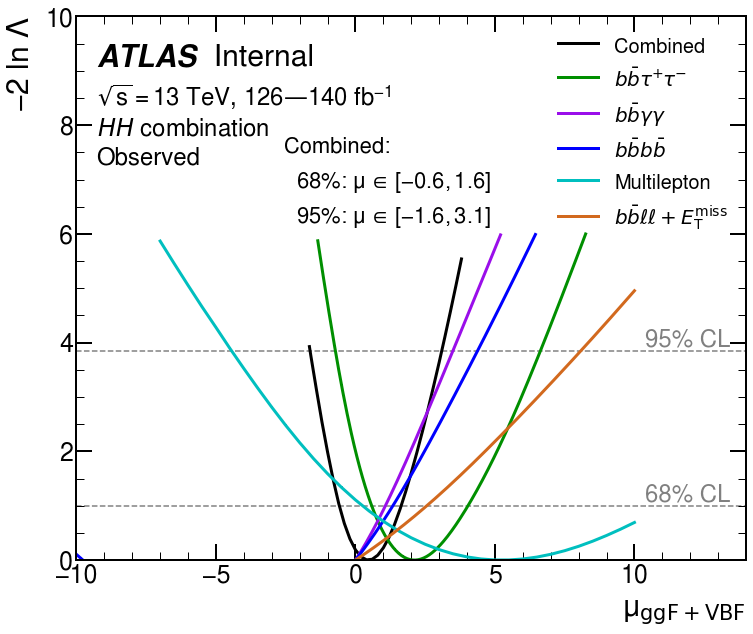

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_mu_obs_tilde.pdf


In [61]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
# xrange = {'kl': (-12, 20),'k2v': (-1.5, 3.5),'mu': (-10,20)}
xrange = {'kl': (-12, 23),'k2v': (-2.2, 5.6),'mu': (-10,14)}
styles = { 'legend': {'loc': 'upper right','fontsize': 20, 'handleheight':1.35},
           'text': {'fontsize': 24},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3},
           'axis': {'labelsize': 25},
           'figure': {'figsize': (12,10), 'dpi': 72}}
anno_op = {'x': 0.31, 'y': 0.75, 'dy': 0.065, 'font_size': 22}

for v in ['mu']:
# for v in ['k2v','mu']:
    if v=='kl':
        channels = ['bbyy', 'bbtautau', 'ml', 'bbbb', 'bbll']
    elif v=='k2v':
        channels = ['bbbb', 'bbtautau', 'bbll', 'bbyy', 'ml']
    else:
        channels = ['bbtautau', 'bbyy', 'bbbb', 'ml', 'bbll']
    for o in ['obs']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected')
        data = {}
        for c in ['combined'] + channels:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            if uncond_df[c]['mu'][0] < 0:
                cut = df_scan.loc[df_scan['mu'] == 0, 'qmu'].iloc[0]
                df_scan['qmu'] -= cut
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
        if v=="mu":
            text_x = 0.977
        else:
            text_x = 0.973
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True,'sigma_text_styles':{'x':text_x}})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in channels + ['combined']:
            dic[c] = {}
            if c not in likelihood_df: continue
            try:
                intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[-1]
                intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
                sigma_at_0 = likelihood_df_orig[c][likelihood_df_orig[c][v] == 0]['qmu'].values[0]
                dic[c]['68% low'], dic[c]['68% high'] = intersections_1
                dic[c]['95% low'], dic[c]['95% high'] = intersections_2
                dic[c]['sigma_at_0'] = np.sqrt(sigma_at_0)
                if c == 'combined':
                    ax.annotate(r'Combined:', 
                                (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
                                (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
                                (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                print(v, o, c, '68%:', intersections_1, '95%:', intersections_2, 'sigma_at_0:', dic[c]['sigma_at_0'])
            except:
                continue
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}_tilde.pdf")
        plt.savefig(filename)
        plt.show()
        print('Save to', filename)
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


<Figure size 432x288 with 0 Axes>

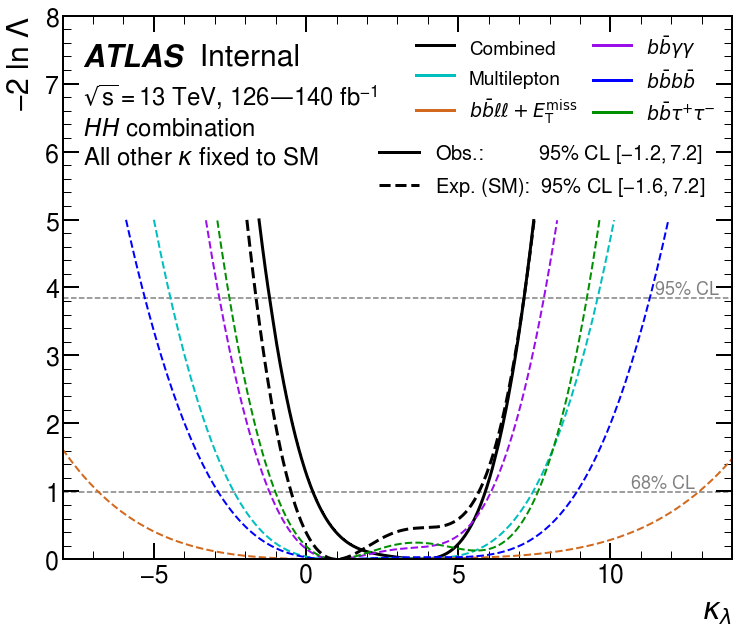

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_kl.pdf


<Figure size 432x288 with 0 Axes>

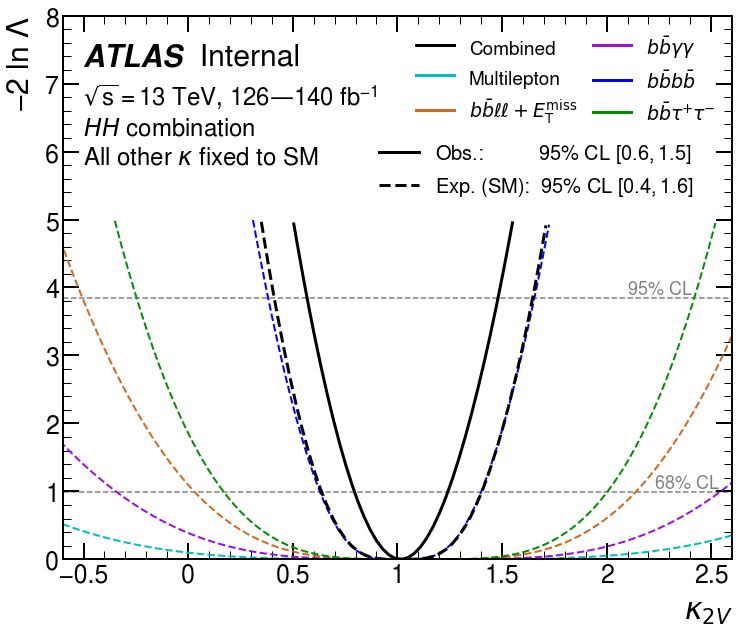

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood/likelihood_k2v.pdf


In [62]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'kl': (-8, 14),'k2v': (-0.6, 2.6)}
styles = { 'legend': {'loc': 'upper right','fontsize': 19, 'handleheight':1.25},
           'text': {'fontsize': 24},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3},
           'axis': {'labelsize': 25},
           'figure': {'figsize': (12,10), 'dpi': 72}}
anno_op = {'x': 0.34, 'y': 0.75, 'dy': 0.065, 'font_size': 20}

for v in ['kl','k2v']:
    channels = ['ml', 'bbll', 'bbyy', 'bbbb', 'bbtautau']
    likelihood_df = {}
    uncond_df = {}
    likelihood_df_orig = {}
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + "//" + r"All other $\mathit{\kappa}$ fixed to SM"
        data = {}
        for c in channels + ['combined']:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df[o] = {}
        uncond_df[o] = {}
        likelihood_df_orig[o] = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[o][c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[o][c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            kl = df_scan[v]
            qmu = df_scan['qmu']
            kl_new = np.arange(kl.min(), kl.max(), 0.005)
            qmu_interpolated = np.interp(kl_new, kl, qmu)
            interpolated_df = pd.DataFrame({v: kl_new, 'qmu': qmu_interpolated})
            filtered_interpolated_df = interpolated_df[interpolated_df['qmu'] <= 5]
            likelihood_df[o][c] = filtered_interpolated_df

    likelihood_df_comb = {'combined':likelihood_df['obs']['combined']}
    config = {'errorband_legend': True,'sigma_text_styles':{'x':0.973},'sigma_text_styles': {'fontsize':18}}
    if v=='k2v':
        config['sigma_text_styles']['x_0.99'] = 0.98
        config['sigma_text_styles']['x_3.84'] = 0.94
    else:
        config['sigma_text_styles']['x_0.99'] = 0.945
        config['sigma_text_styles']['x_3.84'] = 0.98
    plotter = Likelihood1DPlot(likelihood_df_comb, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                               analysis_label_options=default_analysis_label_options, config=config)
    ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=8, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
    intersections_obs = get_intervals(likelihood_df['obs']['combined'][v].values, likelihood_df['obs']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
    intersections_exp = get_intervals(likelihood_df['exp']['combined'][v].values, likelihood_df['exp']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
    # line1, = ax.plot([], [], '-', color='k', label='Combined (observed)')
    # line2, = ax.plot([], [], '--', color='k', label='Combined (expected)')
    # legends = [line1, line2]
    # for c in likelihood_df['exp']:
    #     data = likelihood_df['exp'][c]
    #     if c=='combined': line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=3)
    #     else:
    #         line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=2)
    #     if c!='combined': legends.append(line)
    # ax.legend(handles=legends, **styles['legend'])

    line1, = ax.plot([], [], '-', color='k', linewidth=3, label='Combined')
    legends = [line1]
    for c in likelihood_df['exp']:
        data = likelihood_df['exp'][c]
        if c=='combined':
            line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=3)
        else:
            line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=2)
        if c!='combined':
            line_, = ax.plot([],[],color=styles_map[c]['color'], label=channel_label_map[c], linestyle='-', linewidth=3)
            legends.append(line_)
    ax.legend(handles=legends, **styles['legend'], ncol=2, columnspacing=0.8)

    ax.add_artist(ax.get_legend())
    line1, = ax.plot([], [], '-',linewidth=3, color='k', label=r'Obs.:          95% CL '+'$[%.1f, %.1f]$' %(intersections_obs[0], intersections_obs[1]))
    line2, = ax.plot([], [], '--',linewidth=3, color='k', label=r'Exp. (SM):  95% CL '+'$[%.1f, %.1f]$' %(intersections_exp[0], intersections_exp[1]))
    ax.legend(handles=[line1,line2],loc=(0.46,0.65),fontsize=20)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}.pdf")
    plt.savefig(filename)
    plt.show()
    print('Save to', filename)
    # dic = json.dumps(dic, indent=4, separators=(',', ': '))
    # with open(filename.replace('.pdf','.json'), 'w') as json_file:
    #     json_file.write(dic)


In [63]:
# combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
# plotdir = set_plotdir(output_dir)

# from quickstats.maths.interpolation import get_intervals
# from quickstats.plots import Likelihood1DPlot
# ylabel = r"$-2\ ln\ \Lambda$"
# # xrange = {'kl': (-12, 20),'k2v': (-1.5, 3.5),'mu': (-10,20)}
# xrange = {'kl': (-2.2, 10),'k2v': (0.1, 2),'mu': (-10,14)}
# styles = { 'legend': {'loc': 'upper right','fontsize': 20, 'handleheight':1.35},
#            'text': {'fontsize': 24},
#            'xlabel': {'fontsize': 30},
#            'ylabel': {'fontsize': 30},
#            'plot': {'linewidth': 3},
#            'axis': {'labelsize': 25},
#            'figure': {'figsize': (12,10), 'dpi': 72}}
# anno_op = {'x': 0.31, 'y': 0.65, 'dy': 0.065, 'font_size': 22}

# for v in ['kl','k2v']:
# # for v in ['k2v']:
#     channels = []
#     for o in ['obs','exp']:
#         default_analysis_label_options['extra_text'] = channel_text['combined'] + ("//" + r"The other $\mathit{\kappa}$ floated" if v!='mu' else '') + '//' + ('Observed' if o == 'obs' else 'Expected (SM)')
#         data = {}
#         for c in ['combined'] + channels:
#             likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}_generic', f'likelihoods_{v}.json')
#             if not os.path.exists(likelihood_path):
#                 print(likelihood_path, 'not exist')
#                 continue
#             data[c] = json.load(open(likelihood_path))
#         likelihood_df = {}
#         uncond_df = {}
#         likelihood_df_orig = {}
#         for c in data:
#             df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
#             uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
#             df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
#             likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
#             likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>5].index)
#         if v=="mu":
#             text_x = 0.977
#         else:
#             text_x = 0.973
#         plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
#                                    analysis_label_options=default_analysis_label_options, config={'errorband_legend': True,'sigma_text_styles':{'x':text_x}})
#         ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
#         dic = {}
#         for c in channels + ['combined']:
#             dic[c] = {}
#             if c not in likelihood_df: continue
#             try:
#                 intersections_01 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)
#                 intersections_02 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)
#                 intersections_1 = intersections_01[0]
#                 intersections_2 = intersections_02[0]
#                 # sigma_at_0 = likelihood_df_orig[c][likelihood_df_orig[c][v] == 0]['qmu'].values[0]
#                 dic[c]['68% low'], dic[c]['68% high'] = intersections_1
#                 if len(intersections_01)>1: dic[c]['68% low add'], dic[c]['68% high add'] = intersections_01[-1]
#                 dic[c]['95% low'], dic[c]['95% high'] = intersections_2
#                 if len(intersections_02)>1: dic[c]['95% low add'], dic[c]['95% high add'] = intersections_02[-1]
#                 # dic[c]['sigma_at_0'] = np.sqrt(sigma_at_0)
#                 if c == 'combined':
#                     if v=='kl':
#                         ax.annotate(r'Combined:', 
#                                     (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                         ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
#                                     (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                         ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
#                                     (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                     else:
#                         ax.annotate(r'Combined:', 
#                                     (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                         ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.2f, %.2f]$' %(intersections_1[0], intersections_1[1]), 
#                                     (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                         ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.2f, %.2f]$' %(intersections_2[0], intersections_2[1]), 
#                                     (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                 # print(v, o, c, '68%:', intersections_01, '95%:', intersections_02, 'sigma_at_0:', dic[c]['sigma_at_0'])
#                 print(v, o, c, '68%:', intersections_01, '95%:', intersections_02)
#             except:
#                 continue
#         os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
#         filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}_generic.pdf")
#         plt.savefig(filename)
#         plt.show()
#         print('Save to', filename)
#         dic = json.dumps(dic, indent=4, separators=(',', ': '))
#         with open(filename.replace('.pdf','.json'), 'w') as json_file:
#             json_file.write(dic)


In [64]:
# combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
# plotdir = set_plotdir(output_dir)

# from quickstats.maths.interpolation import get_intervals
# from quickstats.plots import Likelihood1DPlot
# ylabel = r"$-2\ ln\ \Lambda$"
# xrange = {'kl': (-2.2, 10),'k2v': (0.1, 2),'mu': (-10,14)}
# styles = { 'legend': {'loc': 'upper right','fontsize': 22, 'handleheight':1.25},
#            'text': {'fontsize': 24},
#            'xlabel': {'fontsize': 30},
#            'ylabel': {'fontsize': 30},
#            'plot': {'linewidth': 3},
#            'axis': {'labelsize': 25},
#            'figure': {'figsize': (12,10), 'dpi': 72}}
# anno_op = {'x': 0.34, 'y': 0.75, 'dy': 0.065, 'font_size': 20}
# styles_map = {
#     'combined_generic': {"color": "darkgrey", "marker": ","},
#     'combined': {"color": "k", "marker": ","},
# }

# for v in ['kl','k2v']:
#     channel_label_map = {
#         'combined_generic': r"Combined "+name_map[v]+" generic",
#         'combined': r"Combined "+name_map[v]+" only",
#     }
#     likelihood_df = {}
#     uncond_df = {}
#     likelihood_df_orig = {}
#     for o in ['obs','exp']:
#         default_analysis_label_options['extra_text'] = channel_text['combined']
#         data = {}
#         for c in ['combined','combined_generic']:
#             suffix = "_generic" if c=='combined_generic' else ''
#             likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, 'combined', combine_tag, f'{v}_{o}{suffix}', f'likelihoods_{v}.json')
#             if not os.path.exists(likelihood_path):
#                 print(likelihood_path, 'not exist')
#                 continue
#             data[c] = json.load(open(likelihood_path))
#         likelihood_df[o] = {}
#         uncond_df[o] = {}
#         likelihood_df_orig[o] = {}
#         for c in data:
#             df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
#             uncond_df[o][c] = df.drop(index=df.index[1:], axis=0, inplace=False)
#             df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
#             likelihood_df_orig[o][c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
#             kl = df_scan[v]
#             qmu = df_scan['qmu']
#             kl_new = np.arange(kl.min(), kl.max(), 0.005)
#             qmu_interpolated = np.interp(kl_new, kl, qmu)
#             interpolated_df = pd.DataFrame({v: kl_new, 'qmu': qmu_interpolated})
#             filtered_interpolated_df = interpolated_df[interpolated_df['qmu'] <= 5]
#             likelihood_df[o][c] = filtered_interpolated_df

#     likelihood_df_comb = {'combined':likelihood_df['obs']['combined']}
#     config = {'errorband_legend': True,'sigma_text_styles':{'x':0.973}}
#     plotter = Likelihood1DPlot(likelihood_df_comb, label_map=channel_label_map, styles_map=styles_map, styles=styles,
#                                analysis_label_options=default_analysis_label_options, config=config)
#     ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=9, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
#     intersections_obs = get_intervals(likelihood_df['obs']['combined'][v].values, likelihood_df['obs']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
#     intersections_exp = get_intervals(likelihood_df['exp']['combined'][v].values, likelihood_df['exp']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
#     intersections_obs_1 = get_intervals(likelihood_df['obs']['combined_generic'][v].values, likelihood_df['obs']['combined_generic']['qmu'].values, level=3.84, delta=0.0001)[0]
#     intersections_exp_1 = get_intervals(likelihood_df['exp']['combined_generic'][v].values, likelihood_df['exp']['combined_generic']['qmu'].values, level=3.84, delta=0.0001)[0]

#     line1, = ax.plot([], [], '-', color='k', linewidth=3, label=channel_label_map['combined'])
#     legends = [line1]
#     for c in likelihood_df['exp']:
#         data = likelihood_df['exp'][c]
#         if c=='combined':
#             line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=3)
#         else:
#             line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=3)
#         if c!='combined':
#             line_, = ax.plot([],[],color=styles_map[c]['color'], label=channel_label_map[c], linestyle='-', linewidth=3)
#             legends.append(line_)
#     ax.legend(handles=legends, **styles['legend'])

#     for c in likelihood_df['obs']:
#         data = likelihood_df['obs'][c]
#         if c!='combined':
#             line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='-', linewidth=3)

#     ax.add_artist(ax.get_legend())
#     line1, = ax.plot([], [], '-',linewidth=3, color='k', label='Obs.')
#     ax.legend(handles=[line1],loc=(0.46,0.7),fontsize=22)
#     if v=='kl':
#         ax.text(0.17, 0.66, name_map[v]+" only 95% CL:           "+r'$[%.1f, %.1f]$               $[%.1f, %.1f]$' %(intersections_obs[0], intersections_obs[1],intersections_exp[0], intersections_exp[1]), fontsize=22,transform=ax.transAxes)
#         ax.text(0.17, 0.60, name_map[v]+" generic 95% CL:      "+r'$[%.1f, %.1f]$               $[%.1f, %.1f]$' %(intersections_obs_1[0], intersections_obs_1[1],intersections_exp_1[0], intersections_exp_1[1]), fontsize=22,transform=ax.transAxes)
#     else:
#         ax.text(0.17, 0.66, name_map[v]+" only 95% CL:         "+r'$[%.2f, %.2f]$             $[%.2f, %.2f]$' %(intersections_obs[0], intersections_obs[1],intersections_exp[0], intersections_exp[1]), fontsize=22,transform=ax.transAxes)
#         ax.text(0.17, 0.60, name_map[v]+" generic 95% CL:    "+r'$[%.2f, %.2f]$             $[%.2f, %.2f]$' %(intersections_obs_1[0], intersections_obs_1[1],intersections_exp_1[0], intersections_exp_1[1]), fontsize=22,transform=ax.transAxes)
#     ax.add_artist(ax.get_legend())
#     line2, = ax.plot([], [], '--',linewidth=3, color='k', label='Exp. (SM)')
#     ax.legend(handles=[line2],loc=(0.7,0.7),fontsize=22)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_generic.pdf")
#     plt.savefig(filename)
#     plt.show()
#     print('Save to', filename)
#     # dic = json.dumps(dic, indent=4, separators=(',', ': '))
#     # with open(filename.replace('.pdf','.json'), 'w') as json_file:
#     #     json_file.write(dic)


In [65]:
# combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
# channels = ['bbtautau', 'bbyy', 'bbbb']
# default_analysis_label_options['extra_text'] = r'$\sigma_{ggF+VBF}^{SM} (\mathit{HH})=32.8$ fb'
# channel_label_map = {
#     'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
#     'bbtautau': r"$\mathit{b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$",
#     'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
#     'bbll': r"$\mathit{b\bar{b}\ell\ell+E_{\mathrm{T}}^{\mathrm{miss}}}$",
#     'ml': r"Multilepton",
#     'combined': r"Combined",
# }
# from quickstats.plots import UpperLimit1DPlot

# suffix = '_nocorr' if 'nocorr' in combine_tag else ''
# plotdir = set_plotdir(output_dir)
# styles = {'figure': {'figsize': (11.111111, 10), 'dpi': 72},
#            'text': {'fontsize': 24},}

# data = {}
# for c in channels + ['combined']:
#     limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c == 'combined' else '', 'mu', 'limits_mu.json')
#     if not os.path.exists(limit_path):
#         print(limit_path, 'not found')
#         continue
#     data[c] = json.load(open(limit_path))
# data_dict = remove_list(data)
# sm_limit_df = pd.DataFrame(data_dict)
# filtered_order = [col for col in ['combined']+channels if col in sm_limit_df.columns]
# sm_limit_df = sm_limit_df[filtered_order]

# plotter = UpperLimit1DPlot(sm_limit_df, channel_label_map, line_below=["bbtautau"], labels=labels, styles=styles,
#                            analysis_label_options=default_analysis_label_options, config={'top_margin': 3.2})
# xlabel = r"95% CL upper limit on $\mathit{HH}$ signal strength $\mathit{\mu_{HH}}$"
# ax = plotter.draw(logx=False, xlabel=xlabel, draw_observed=True, draw_stat=False, sig_fig=1, add_text=True)
# ax.set_xlim([0, 28])
# os.makedirs(os.path.join(plotdir, f'{status}/limit'), exist_ok=True)
# filename = os.path.join(plotdir, f'{status}/limit', f"limit_mu_3channel.pdf")
# plt.tight_layout()
# plt.savefig(filename)
# plt.show()
# print('Save to', filename)
# sm_limit_df.to_csv(filename.replace('.pdf', '.csv'))

In [66]:
# combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'
# plotdir = set_plotdir(output_dir)

# from quickstats.maths.interpolation import get_intervals
# from quickstats.plots import Likelihood1DPlot
# ylabel = r"$-2\ ln\ \Lambda$"
# # xrange = {'kl': (-12, 20),'k2v': (-1.5, 3.5),'mu': (-10,20)}
# xrange = {'kl': (-7, 15),'k2v': (-2.8, 6.2),'mu': (-10,14)}
# styles = { 'legend': {'loc': 'upper right','fontsize': 20, 'handleheight':1.35},
#            'text': {'fontsize': 24},
#            'xlabel': {'fontsize': 30},
#            'ylabel': {'fontsize': 30},
#            'plot': {'linewidth': 3},
#            'axis': {'labelsize': 25},
#            'figure': {'figsize': (12,10), 'dpi': 72}}
# anno_op = {'x': 0.31, 'y': 0.75, 'dy': 0.065, 'font_size': 22}

# for v in ['kl']:
# # for v in ['k2v']:
#     if v=='kl':
#         channels = ['bbyy', 'bbtautau', 'bbbb']
#     elif v=='k2v':
#         channels = ['bbbb', 'bbtautau', 'bbyy']
#     for o in ['obs','exp']:
#         default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected (SM)')
#         data = {}
#         for c in ['combined'] + channels:
#             likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
#             if not os.path.exists(likelihood_path):
#                 print(likelihood_path, 'not exist')
#                 continue
#             data[c] = json.load(open(likelihood_path))
#         likelihood_df = {}
#         uncond_df = {}
#         likelihood_df_orig = {}
#         for c in data:
#             df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
#             uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
#             df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
#             likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
#             likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
#         if v=="mu":
#             text_x = 0.977
#         else:
#             text_x = 0.973
#         plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
#                                    analysis_label_options=default_analysis_label_options, config={'errorband_legend': True,'sigma_text_styles':{'x':text_x}})
#         ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
#         dic = {}
#         for c in channels + ['combined']:
#             dic[c] = {}
#             if c not in likelihood_df: continue
#             try:
#                 intersections_01 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)
#                 intersections_02 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)
#                 intersections_1 = intersections_01[0]
#                 intersections_2 = intersections_02[0]
#                 # sigma_at_0 = likelihood_df_orig[c][likelihood_df_orig[c][v] == 0]['qmu'].values[0]
#                 dic[c]['68% low'], dic[c]['68% high'] = intersections_1
#                 if len(intersections_01)>1: dic[c]['68% low add'], dic[c]['68% high add'] = intersections_01[-1]
#                 dic[c]['95% low'], dic[c]['95% high'] = intersections_2
#                 if len(intersections_02)>1: dic[c]['95% low add'], dic[c]['95% high add'] = intersections_02[-1]
#                 # dic[c]['sigma_at_0'] = np.sqrt(sigma_at_0)
#                 if c == 'combined':
#                     ax.annotate(r'Combined:', 
#                                 (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                     ax.annotate(r'  $68\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
#                                 (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                     ax.annotate(r'  $95\%$: '+(name_map[v] if v!= "mu" else r"$\mu$")+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
#                                 (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                 # print(v, o, c, '68%:', intersections_01, '95%:', intersections_02, 'sigma_at_0:', dic[c]['sigma_at_0'])
#                 print(v, o, c, '68%:', intersections_01, '95%:', intersections_02)
#             except:
#                 continue
#         os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
#         filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}_3channel.pdf")
#         plt.savefig(filename)
#         plt.show()
#         print('Save to', filename)
#         dic = json.dumps(dic, indent=4, separators=(',', ': '))
#         with open(filename.replace('.pdf','.json'), 'w') as json_file:
#             json_file.write(dic)


combined obs -0.9844299180188208 6.973436118199455
combined exp -0.5036544348171399 6.432759572049676
ml obs -5.687084398344274 11.058839926803675
ml exp -3.998131363476864 9.167254292456745
bbtautau obs -2.7839353899192876 9.108225164836465
bbtautau exp -1.43228072553081 8.253637951022897
bbyy obs -1.522519166355089 6.92423769671243
bbyy exp -2.0378418884573404 7.25446492075811
bbbb obs -3.8166583955586137 10.938617609793264
bbbb exp -4.611421982321463 10.749446734569705
save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit_scan/limit_scan_kl.pdf


<Figure size 432x288 with 0 Axes>

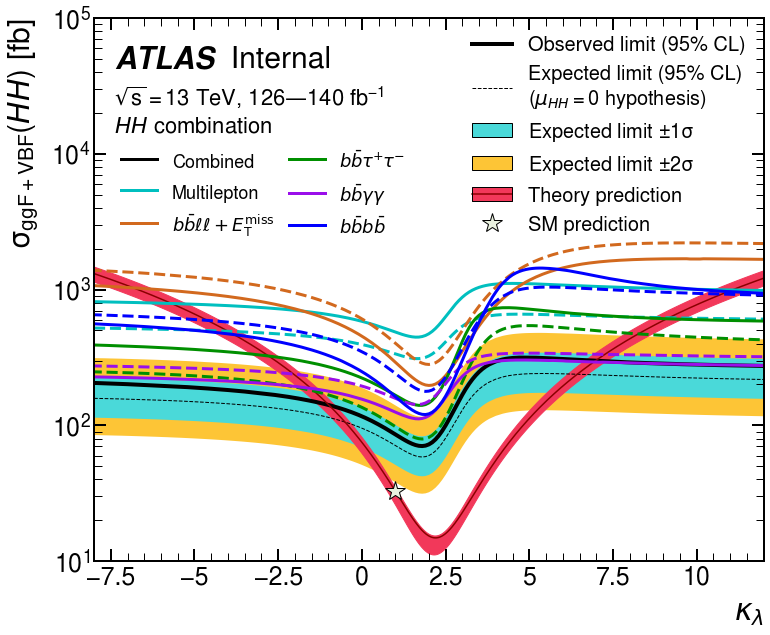

In [67]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
do_individual = True
plotdir = set_plotdir(output_dir)
scan_poi = 'kl'
channels = ['ml', 'bbll', 'bbtautau', 'bbyy', 'bbbb']
default_analysis_label_options['extra_text'] = channel_text['combined']

from quickstats.plots import UpperLimit2DPlot
import matplotlib.lines as mlines

config = {'observed_plot_styles': {'marker': None, 'linewidth': 4}}
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 20},
          'axis':{'tick_bothsides': True,
                  'major_length': 12,
                  'labelsize': 25},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 22},
          'figure': {'figsize': (12,10), 'dpi': 72}}
def theory_cross_section(kl):
    xs_ggF = (70.3874-50.4111*kl+11.0595*np.square(kl))*31.05/31.0358
    xs_ggF_up = xs_ggF * np.sqrt(np.square((np.maximum(76.6075 - 56.4818*kl + 12.635*np.square(kl), 75.4617 - 56.3164*kl + 12.7135*np.square(kl)) * 31.05/31.0358 / xs_ggF - 1)) + 0.03**2)
    xs_ggF_down = xs_ggF * np.sqrt(np.square((np.minimum(57.6809 - 42.9905*kl + 9.58474*np.square(kl), 58.3769 - 43.9657*kl + 9.87094*np.square(kl)) * 31.05/31.0358 / xs_ggF - 1)) + 0.03**2)
    xs_VBF = (4.581-4.245*kl+1.359*np.square(kl))*1.726/(4.581-4.245+1.359)
    xs_VBF_up = xs_VBF * np.sqrt(0.0003**2 + 0.021**2)
    xs_VBF_down = xs_VBF * np.sqrt(0.0004**2 + 0.021**2)
    xs_HH = xs_ggF + xs_VBF
    xs_HH_up = np.sqrt(np.square(xs_ggF_up) + np.square(xs_VBF_up))
    xs_HH_down = np.sqrt(np.square(xs_ggF_down) + np.square(xs_VBF_down))
    return kl, xs_HH, xs_HH+xs_HH_up, xs_HH-xs_HH_down
def get_intersections(kl, xsec, kl_dense, theory_xsec_dense):
    interpolated_limit = np.interp(kl_dense, kl, xsec)
    limitm = interpolated_limit - theory_xsec_dense 
    idx = np.argwhere(np.diff(np.sign(limitm))).flatten()
    intersections = [kl_dense[x] - (kl_dense[x+1] - kl_dense[x])/(limitm[x+1] - limitm[x]) * limitm[x] for x in idx]
    return intersections

dfs = {}
for c in ['combined'] + channels:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c=='combined' else '', f'xsec_{scan_poi}', 'limits_mu.json')
    data = json.load(open(limit_path))
    dfs[c] = pd.DataFrame(data).dropna().set_index([scan_poi])
poi_values =  dfs['combined'].index.astype(float).values
poi_values_dense = np.linspace(min(poi_values), max(poi_values), 2000) 
poi_values_dense, theory_xs_dense, theory_xs_upper_dense, theory_xs_lower_dense = theory_cross_section(poi_values_dense)
plotter = UpperLimit2DPlot(dfs['combined'], labels=labels,
                           theory_func=theory_cross_section, config=config, styles=styles,
                           analysis_label_options=default_analysis_label_options)
plotter.add_curve(poi_values_dense, theory_xs_dense, theory_xs_lower_dense, theory_xs_upper_dense, label="Theory prediction")
plotter.add_highlight(1, theory_cross_section(1)[1], label="SM prediction")
ax = plotter.draw(xlabel=name_map[scan_poi], ylabel=r"$\sigma_{ggF+VBF}(\mathit{HH})$ [fb]",scale_theory=True, draw_theory_curve=True, 
                  draw_observed=True, logy=True, ylim=[10,1e5], xlim=[-8, 12], draw_errorband=True)
if do_individual:
    handels = []
    handel_labels = []
    dic = {}
    for c in dfs.keys():
        data = dfs[c]
        indices = data.index.astype(float).values
        x0, y0, xh, xl = theory_cross_section(indices)
        exp_limits = data['0'].values * y0
        obs_limits = data['obs'].values * y0
        color = styles_map[c]['color']
        if c != 'combined':
            ax.semilogy(x0, exp_limits, color=color, linestyle='--', linewidth=3)
            ax.semilogy(x0, obs_limits, color=color, linestyle='-', linewidth=3)
        handels.append(mlines.Line2D([], [], color=color, linewidth=3))
        handel_labels.append(channel_label_map[c])
        intersections = get_intersections(x0, exp_limits, poi_values_dense, theory_xs_dense)
        intersections_obs = get_intersections(x0, obs_limits, poi_values_dense, theory_xs_dense)
        try:
            print(c, 'obs', intersections_obs[0], intersections_obs[1])
            print(c, 'exp', intersections[0], intersections[1])
            dic[c] = {'exp low': intersections[0], 'exp high': intersections[1],
                    'obs low': intersections_obs[0], 'obs high': intersections_obs[1]}
        except:
            continue
    ax.add_artist(ax.get_legend())
    ax.legend(handels[:3], handel_labels[:3], loc=(0.03, 0.58), fontsize=18, handleheight=1.5)
    ax.add_artist(ax.get_legend())
    ax.legend(handels[3:], handel_labels[3:], loc=(0.28, 0.58), fontsize=18, handleheight=1.5)
suffix = '_noindiv' if not do_individual else ''
os.makedirs(os.path.join(plotdir, f'{status}/limit_scan'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit_scan', f"limit_scan_{scan_poi}{suffix}.pdf")
plt.savefig(filename)
print("save to", filename)
plt.show()
dic = json.dumps(dic, indent=4, separators=(',', ': '))
with open(filename.replace('.pdf','.json'), 'w') as json_file:
    json_file.write(dic)

combined obs 0.5211717943099056 1.5318799518764334
combined exp 0.41608840508747097 1.6429846747100134
bbll obs -0.27596408654175575 2.4399064839877314
bbll exp -0.4662960722841705 2.6371544210160485
bbtautau obs -0.44483409663403917 2.6120487316065466
bbtautau exp -0.2413257538768902 2.4144664526456907
bbyy obs -0.6532973776292764 2.854435242078347
bbyy exp -1.096112736923687 3.2976332311588257
bbbb obs 0.49312333076952564 1.5437072039362392
bbbb exp 0.38070300401555346 1.6572700137759624
save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/limit_scan/limit_scan_k2v.pdf


<Figure size 432x288 with 0 Axes>

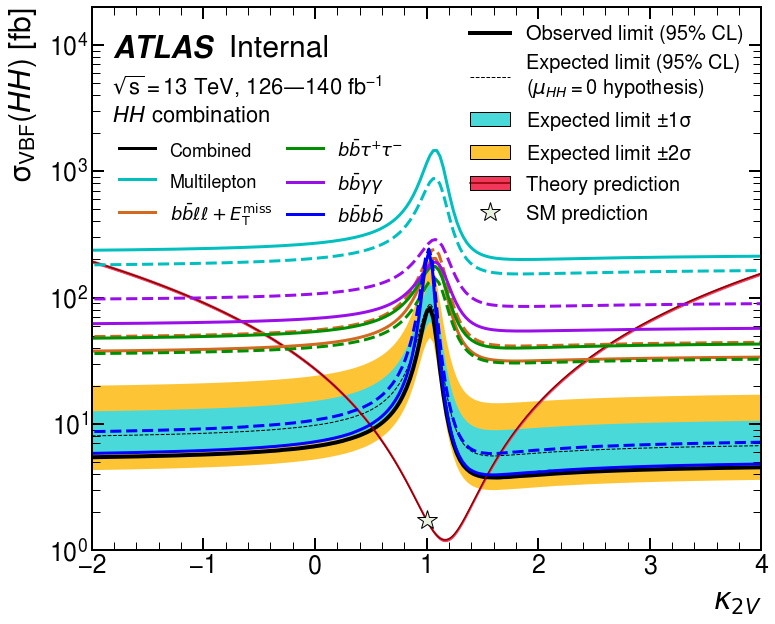

In [68]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
do_individual = True
plotdir = set_plotdir(output_dir)
scan_poi = 'k2v'
channels = ['ml', 'bbll', 'bbtautau', 'bbyy', 'bbbb']
default_analysis_label_options['extra_text'] = channel_text['combined']

from quickstats.plots import UpperLimit2DPlot
import matplotlib.lines as mlines
import sympy

config = {'observed_plot_styles': {'marker': None, 'alpha': 1, 'linewidth': 4}}
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 20},
          'axis':{'tick_bothsides': True,
                  'major_length': 12,
                  'labelsize': 25},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 22},
          'figure': {'figsize': (12,10), 'dpi': 72}}

def theory_cross_section(k2v):
    basis_list = [
        # ([k2v, kl, kv], xsec)
        ([1, 1, 1], 1.18),
        ([1.5, 1, 1], 2.30),
        ([2, 1, 1], 9.97),
        ([1, 0, 1], 3.17),
        ([1, 10, 1], 67.4),
        ([1, 1, 1.5], 45.4),
    ]
    xsec_correction = 1.726/1.18
    theory_basis_list, xsec_list = zip(*basis_list)
    corrected_xsecs = [xsec * xsec_correction for xsec in xsec_list]
    basis_states = [[sympy.Rational(param) for param in basis] for basis in theory_basis_list]
    _k2v = sympy.Symbol("\kappa_{2V}")
    _kl = sympy.Symbol("\kappa_{\lambda}")
    _kv = sympy.Symbol("\kappa_{V}")
    diagram_term_list = [
            lambda k2v, kl, kv: kv ** 2 * kl ** 2,
            lambda k2v, kl, kv: kv ** 4,
            lambda k2v, kl, kv: k2v ** 2,
            lambda k2v, kl, kv: kv ** 3 * kl,
            lambda k2v, kl, kv: k2v * kl * kv,
            lambda k2v, kl, kv: kv ** 2 * k2v,
    ]
    combination_matrix = sympy.Matrix([[term(*base) for term in diagram_term_list] for base in basis_states])
    inversion = combination_matrix.inv()
    term_vector = sympy.Matrix([[term(_k2v, _kl, _kv)] for term in diagram_term_list])
    amplitudes = sympy.Matrix([sympy.Symbol(f"A{n}") for n in np.arange(len(diagram_term_list))])
    final_amplitude = (term_vector.T * inversion * amplitudes)[0]
    amplitude_function = sympy.lambdify([_k2v, _kl, _kv] + [*amplitudes], final_amplitude, "numpy")
    theory_combination_function = lambda couplings: amplitude_function(*couplings, *corrected_xsecs)
    theory_xs_values = theory_combination_function((np.array(k2v), 1, 1))
    return k2v, theory_xs_values, theory_xs_values*(1+np.sqrt(0.0003**2 + 0.021**2)), theory_xs_values*(1-np.sqrt(0.0004**2 + 0.021**2))
def get_intersections(k2v, xsec, k2v_dense, theory_xsec_dense):
    interpolated_limit = np.interp(k2v_dense, k2v, xsec)
    limitm = interpolated_limit - theory_xsec_dense 
    idx = np.argwhere(np.diff(np.sign(limitm))).flatten()
    intersections = [k2v_dense[x] - (k2v_dense[x+1] - k2v_dense[x])/(limitm[x+1] - limitm[x]) * limitm[x] for x in idx]
    return intersections

dfs = {}
for c in  ['combined'] + channels:
    limit_path = os.path.join(output_dir, 'limit', resonant_type, c, combine_tag if c=='combined' else '', f'xsec_{scan_poi}', 'limits_mu_VBF.json')
    data = json.load(open(limit_path))
    dfs[c] = pd.DataFrame(data).dropna().set_index([scan_poi])
poi_values =  dfs['combined'].index.astype(float).values
poi_values_dense = np.linspace(min(poi_values), max(poi_values), 2000) 
poi_values_dense, theory_xs_dense, theory_xs_upper_dense, theory_xs_lower_dense = theory_cross_section(poi_values_dense)
plotter = UpperLimit2DPlot(dfs['combined'], labels=labels,
                           theory_func=theory_cross_section, config=config, styles=styles,
                           analysis_label_options=default_analysis_label_options)
plotter.add_curve(poi_values_dense, theory_xs_dense, theory_xs_lower_dense, theory_xs_upper_dense, label="Theory prediction")
plotter.add_highlight(1, theory_cross_section(1)[1], label="SM prediction")
ax = plotter.draw(xlabel=name_map[scan_poi], ylabel=r"$\sigma_{VBF}(\mathit{HH})$ [fb]",scale_theory=True, draw_theory_curve=True, 
                  draw_observed=True, logy=True, ylim=[1,2e4], xlim=[-2, 4], draw_errorband=True)
if do_individual:
    handels = []
    handel_labels = []
    dic = {}
    for c in dfs.keys():
        data = dfs[c]
        indices = data.index.astype(float).values
        x0, y0, xh, xl = theory_cross_section(indices)
        exp_limits = data['0'].values * y0
        obs_limits = data['obs'].values * y0
        color = 'k' if c=='combined' else styles_map[c]['color']
        if c != 'combined':
            ax.semilogy(x0, exp_limits, color=color, linestyle='--', linewidth=3, alpha=1)
            ax.semilogy(x0, obs_limits, color=color, linestyle='-', linewidth=3)
        handels.append(mlines.Line2D([], [], color=color, linewidth=3))
        handel_labels.append(channel_label_map[c])
        intersections = get_intersections(x0, exp_limits, poi_values_dense, theory_xs_dense)
        intersections_obs = get_intersections(x0, obs_limits, poi_values_dense, theory_xs_dense)
        try:
            print(c, 'obs', intersections_obs[0], intersections_obs[1])
            print(c, 'exp', intersections[0], intersections[1])
            dic[c] = {'exp low': intersections[0], 'exp high': intersections[1],
                    'obs low': intersections_obs[0], 'obs high': intersections_obs[1]}
        except:
            continue
    ax.add_artist(ax.get_legend())
    ax.legend(handels[:3], handel_labels[:3], loc=(0.03, 0.58), fontsize=18, handleheight=1.5)
    ax.add_artist(ax.get_legend())
    ax.legend(handels[3:], handel_labels[3:], loc=(0.28, 0.58), fontsize=18, handleheight=1.5)
suffix = '_noindiv' if not do_individual else ''
os.makedirs(os.path.join(plotdir, f'{status}/limit_scan'), exist_ok=True)
filename = os.path.join(plotdir, f'{status}/limit_scan', f"limit_scan_{scan_poi}{suffix}.pdf")
plt.savefig(filename)
print("save to", filename)
plt.show()
dic = json.dumps(dic, indent=4, separators=(',', ': '))
with open(filename.replace('.pdf','.json'), 'w') as json_file:
    json_file.write(dic)

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbyy.pdf


<Figure size 432x288 with 0 Axes>

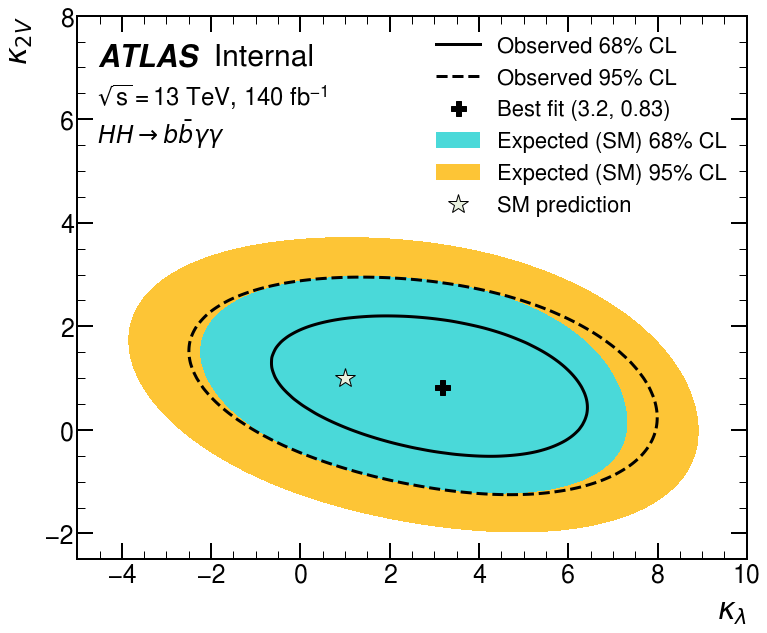

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbtautau.pdf


<Figure size 432x288 with 0 Axes>

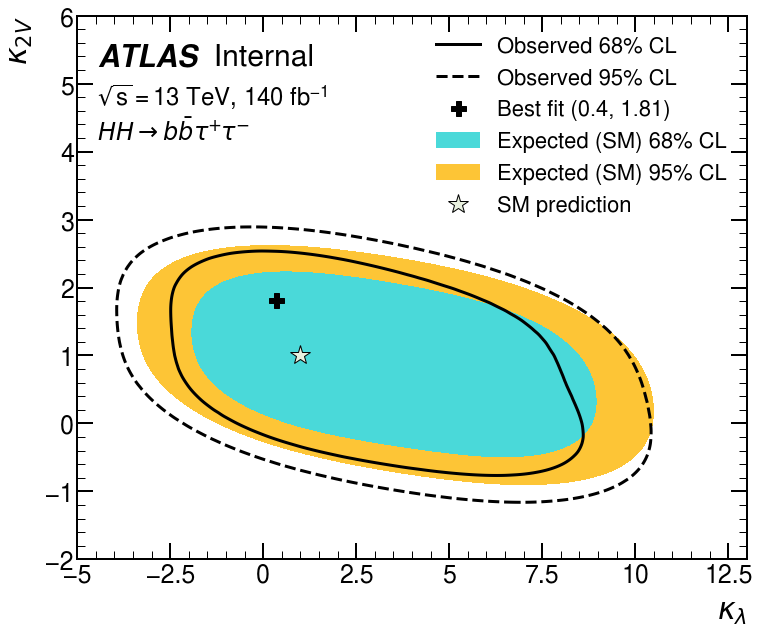

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbbb.pdf


<Figure size 432x288 with 0 Axes>

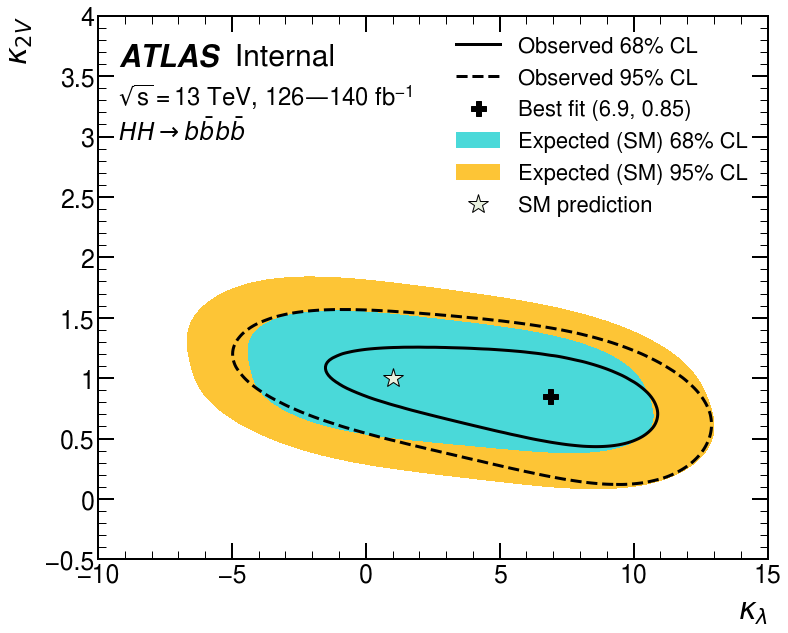

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_bbll.pdf


<Figure size 432x288 with 0 Axes>

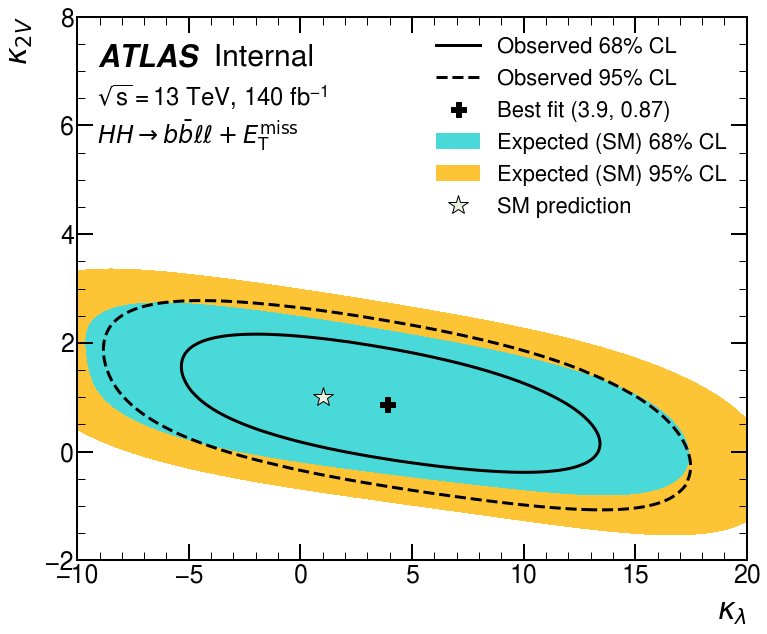

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_ml.pdf


<Figure size 432x288 with 0 Axes>

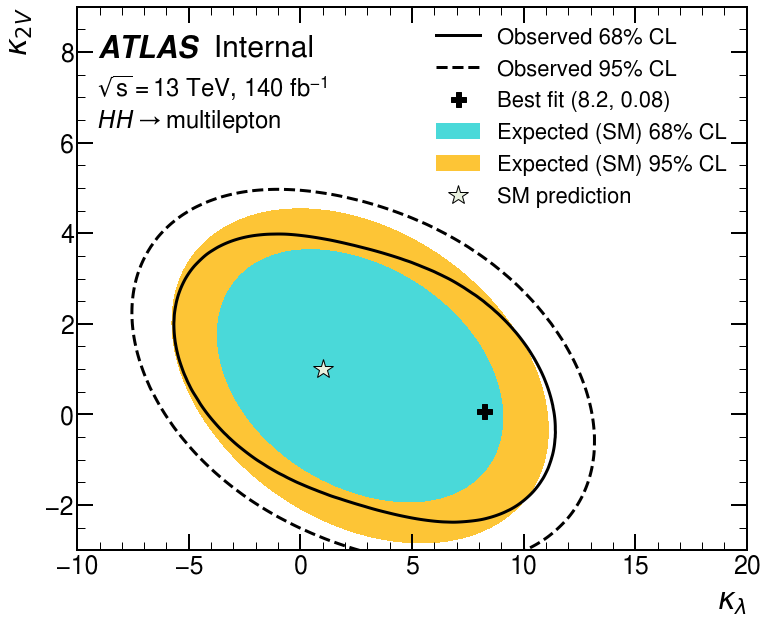

Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_combined.pdf


<Figure size 432x288 with 0 Axes>

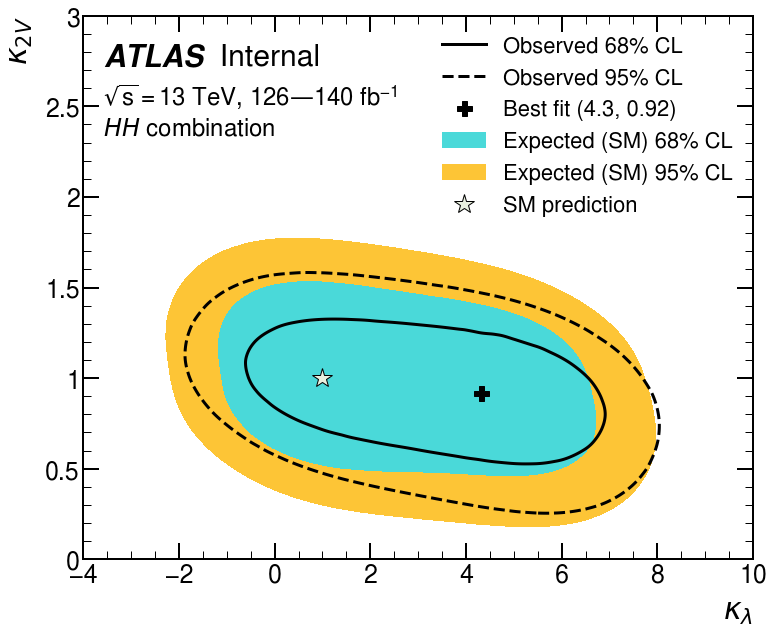

In [69]:
combine_tag = 'bbbb_bbll_bbtautau_bbyy_ml-fullcorr'
params = ('kl', 'k2v')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll', 'ml'] + ['combined']
ranges = {'bbbb': {'xmin': -10, 'xmax': 15, 'ymin': -0.5, 'ymax': 4},
          'bbtautau': {'xmin': -5, 'xmax': 13, 'ymin': -2, 'ymax': 6},
          'bbyy': {'xmin': -5, 'xmax': 10, 'ymin': -2.5, 'ymax': 8},
          'bbll': {'xmin': -10, 'xmax': 20, 'ymin': -2, 'ymax': 8},
          'ml': {'xmin': -10, 'xmax': 20, 'ymin': -3, 'ymax': 9},
          'combined': {'xmin': -4, 'xmax': 10, 'ymin': 0, 'ymax': 3}}
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 22},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 24},
          'axis':{'labelsize': 25},
          'figure': {'figsize': (12,10), 'dpi': 72}}
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536"],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected (SM) {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.1f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k"],
            'linestyles': ['solid', 'dashed'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.1f}, {y:.2f})',
    }
}
dfs_all = {}
for c in channels:
    rangec = ranges[c]
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c]
    if c in ['bbll','bbyy','bbtautau','ml']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    dfs_all[c] = dfs
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 1, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename)
    plt.show()


Save to /eos/home-c/caiyi/HH_comb/hh_framework/hhcomb_to_upload/sm_kappa/output/figures/int/likelihood_2d/likelihood_kl_k2v_new.pdf


<Figure size 432x288 with 0 Axes>

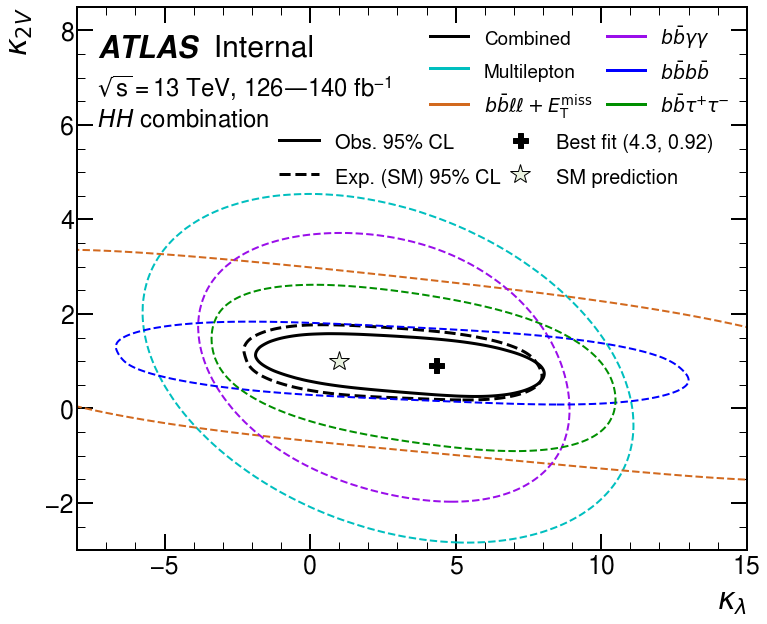

In [70]:
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 22},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 24},
          'axis':{'labelsize': 25},
          'figure': {'figsize': (12,10), 'dpi': 72}}
config_map = {
    'exp': {
        'contour_styles': {
            'colors': ["k","k"],
            'linestyles': ['dashed','solid'],
            'linewidths': 3
        },
        'legend_label': 'Expected {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.1f}, {y:.1f})',            
    },
    'obs': {
        # 'contourf_styles': {
        #     'colors': ["#FDC536","#4AD9D9"],
        #     'alpha': 1
        # },
        # 'fill_contour': True,
        'contour_styles': {
            'colors': ["k","k"],
            'linestyles': ['solid','solid'],
            'linewidths': 3
        },
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.1f}, {y:.1f})',
    }
}
plotter = Likelihood2DPlot(dfs_all['combined'], config={"interval_formats": {"95": ['0.95']}}, config_map=config_map, styles=styles, analysis_label_options=analysis_label_options)
plotter.add_highlight(1, 1, label="SM prediction")
ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                  targets=['obs','exp'],
                  xlabel=name_map[params[0]],
                  ylabel=name_map[params[1]],
                  draw_bestfit=['obs'],
                  interval_format='95',xmin=-8, xmax=15, ymin=-3, ymax=8.5)
line0, = ax.plot([], [], '-', linewidth=3, color='k', label=channel_label_map['combined'])
lines = [line0]
for c in ['ml', 'bbll', 'bbyy', 'bbbb', 'bbtautau']:
    plotter.draw_single_data(ax, dfs_all[c]['exp'], xattrib=params[0], yattrib=params[1], interval_format='95',config={'contour_styles':{'colors':styles_map[c]['color'],'linestyles':'dashed','linewidths':2},'fill_contour':False,'legend_label':'','interpolation':'cubic'})
    line, = ax.plot([], [], '-', linewidth=3, color=styles_map[c]['color'], label=channel_label_map[c])
    lines.append(line)
ax.legend(handles=lines, loc='upper right', ncol=2, fontsize=19, handleheight=1.5, columnspacing=0.8)
ax.add_artist(ax.get_legend())
line1, = ax.plot([], [], '-', linewidth=3, color='k', label='Obs. 95% CL')
line2, = ax.plot([], [], '--', linewidth=3, color='k', label='Exp. (SM) 95% CL')
ax.legend(handles=[line1,line2], loc=(0.29,0.65), fontsize=20, handleheight=1.5)
ax.add_artist(ax.get_legend())
line1, = ax.plot([], [], marker='P',linewidth=0,markersize=15, label='Best fit (4.3, 0.92)')
line2, = ax.plot([], [], marker='*',linewidth=0,markersize=20,color='#E9F1DF',markeredgecolor='black', label='SM prediction')
ax.legend(handles=[line1,line2], loc=(0.62,0.65), fontsize=20, handleheight=1.5)
filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_new.pdf")
print('Save to', filename)
plt.savefig(filename)
plt.show()

In [71]:
# combine_tag = 'bbbb_bbll_bbtautau_bbyy-fullcorr'
# params = ('mu_ggF', 'mu_VBF')
# config_map = {
#     'exp': {
#         'contourf_styles': {
#             'colors': ["#4AD9D9", "#FDC536"],
#             'alpha': 1
#         },
#         'fill_contour': True,
#         'legend_label': 'Expected {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'contour_styles': {
#             'colors': ["k", "k"],
#             'linestyles': ['solid', 'dashed'],
#             'linewidths': 3
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#     }
# }
# plotdir = set_plotdir(output_dir)

# from quickstats.plots import Likelihood2DPlot
# channels = ['bbyy', 'bbtautau', 'bbbb', 'bbll']
# styles = {'xlabel': {'fontsize': 25},
#           'ylabel': {'fontsize': 25}}

# for c in channels:
#     rangec = {'xmin': -10, 'xmax': 15, 'ymin': -100, 'ymax': 300}
#     analysis_label_options = default_analysis_label_options
#     analysis_label_options['extra_text'] = channel_text[c]
#     if c in ['bbll','bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
#     else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
#     dfs = {}
#     data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[1].replace("_","")}_{params[0].replace("_","")}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['obs'] = pd.DataFrame(data_obs)
#     dfs['obs'] = dfs['obs'][dfs['obs']['status'] == 0]
#     data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[1].replace("_","")}_{params[0].replace("_","")}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['exp'] = pd.DataFrame(data_exp)
#     dfs['exp'] = dfs['exp'][dfs['exp']['status'] == 0]
#     plotter = Likelihood2DPlot(dfs, config_map=config_map,
#                                analysis_label_options=analysis_label_options)
#     plotter.add_highlight(1, 1, label="SM prediction")
#     ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                       targets=['obs','exp'],
#                       xlabel=name_map[params[0]],
#                       ylabel=name_map[params[1]],
#                       draw_bestfit=['obs'],
#                       interval_format='68_95',**rangec)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
#     print('Save to', filename)
#     plt.savefig(filename, bbox_inches="tight")
#     plt.show()
